### Fundamentos Teóricos de la Regresión Logística

#### Introducción
La Regresión Logística es un modelo estadístico utilizado para predecir la probabilidad de una
variable dependiente categórica (binaria) en función de una o más variables independientes. A
diferencia de la regresión lineal, que predice valores continuos, la regresión logística predice
categorías.

#### Función Sigmoide
La función sigmoide es clave en la regresión logística y se define como:
$$
sigmoid(z) = \frac{1}{1 + e^{-z}}
$$
Donde \(z\) es una combinación lineal de las características de entrada:
$$
z = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
$$
La salida de la función sigmoide es un valor entre 0 y 1, lo que permite interpretarlo como una probabilidad.

#### Función de Costo
La función de costo utilizada en la regresión logística es la **entropía cruzada** (log-loss):
$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(h_\theta(x_i)) + (1 - y_i) \log(1 - h_\theta(x_i)) \right]
$$
Donde:
- \( y_i \) es la etiqueta real de la observación \( i \).
- \( h_\theta(x_i) \) es la predicción del modelo.
- \( m \) es el número total de ejemplos en el conjunto de datos.

#### Optimización
Para minimizar la función de costo y encontrar los parámetros óptimos \( \theta \), se utiliza el **gradiente descendente**:
$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$
Donde \( \alpha \) es la tasa de aprendizaje.


In [4]:
%pip install numpy pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


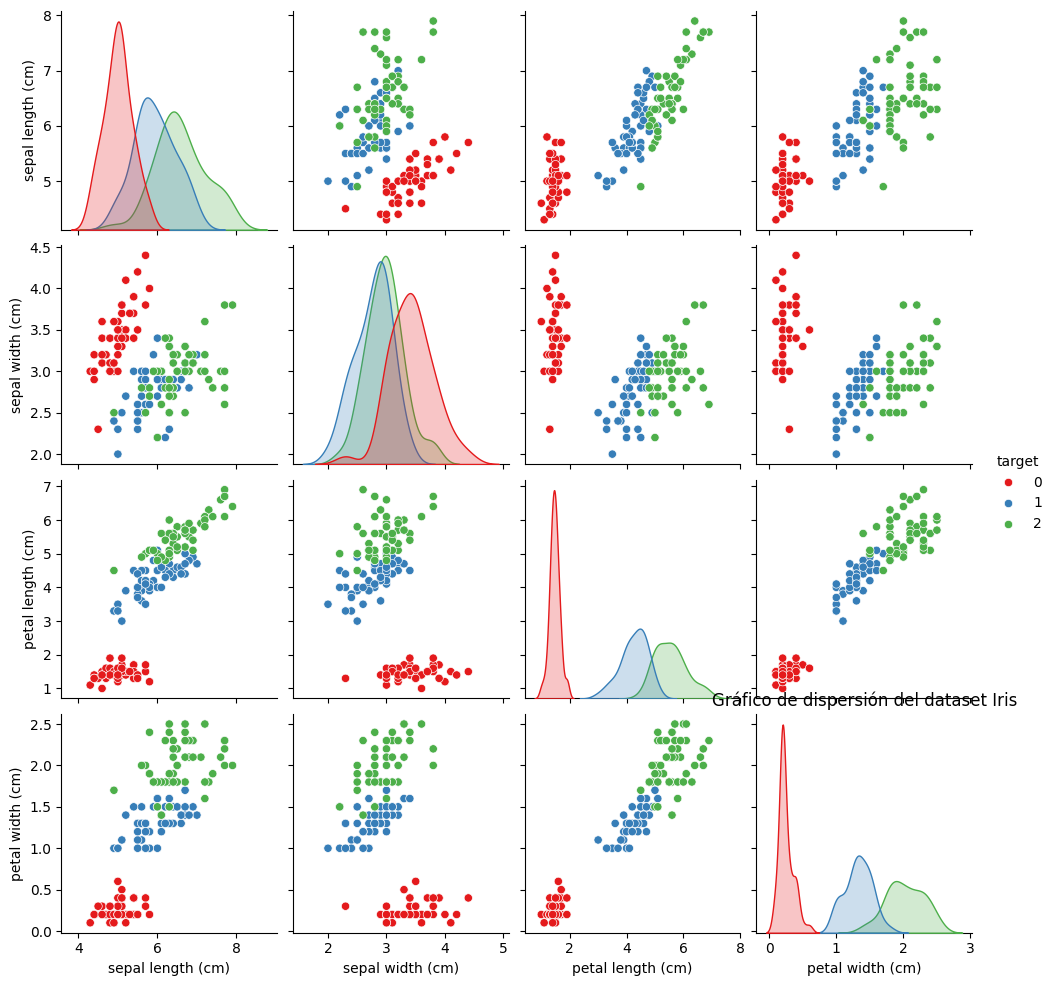

Accuracy: 0.93
Matriz de Confusión:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



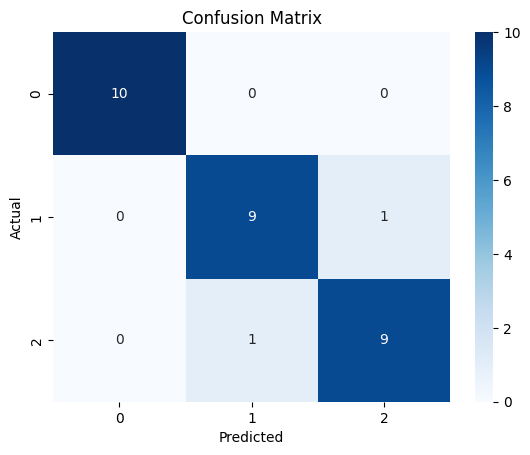

In [5]:
# Importo las librerías que voy a necesitar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importo módulos de scikit-learn para trabajar con el dataset y construir el modelo
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargo el dataset Iris desde scikit-learn
iris = load_iris()
X = iris.data              # Características del dataset
y = iris.target            # Etiquetas (clases)

# Creo un DataFrame para visualizar mejor los datos
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# Muestro las primeras filas del dataset para tener una idea general
print(df.head())

# Grafico la relación entre características coloreando según la clase
sns.pairplot(df, hue='target', palette='Set1')
plt.title("Gráfico de dispersión del dataset Iris")
plt.show()

# Divido el dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Normalizo los datos para que todas las características tengan la misma escala
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajusto y transformo los datos de entrenamiento
X_test = scaler.transform(X_test)        # Solo transformo los datos de prueba

# Creo el modelo de Regresión Logística y lo entreno
model = LogisticRegression(max_iter=200)  # aumento max_iter por si no converge rápido
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo la precisión del modelo y otras métricas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Imprimo los resultados
print(f"Accuracy: {accuracy:.2f}")
print("Matriz de Confusión:\n", conf_matrix)
print("Reporte de Clasificación:\n", report)

# Visualizo la matriz de confusión como mapa de calor
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
